In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization

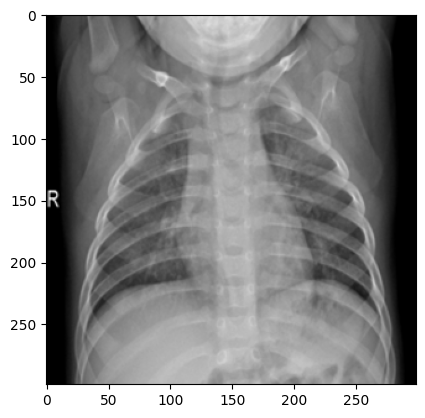

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-1000.png')
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

## Load data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/期末/COVID.metadata.xlsx')
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
urls = os.listdir('/content/drive/MyDrive/Colab Notebooks/covid/images')
path = "/content/drive/MyDrive/Colab Notebooks/covid/images" + urls[0]
print(path)

/content/drive/MyDrive/Colab Notebooks/covid/imagesCOVID-2587.png


In [ ]:
#Loading Images
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
covid_path = "/content/drive/MyDrive/Colab Notebooks/covid/images"
covid_url = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covid_url, 1)

/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2587.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2590.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2591.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2592.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2586.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2603.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2624.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2648.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2672.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2673.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2666.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2661.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2649.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2678.png
/content/drive/MyDrive/Colab Notebooks/covid/images/COVID-2681

In [ ]:
normal_path = "/content/drive/MyDrive/Colab Notebooks/normal/images"
normal_url = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_url, 0)

串流輸出內容已截斷至最後 5000 行。
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5196.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5202.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5214.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5207.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5192.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5187.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5199.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5186.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5213.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5215.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5220.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5193.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5195.png
/content/drive/MyDrive/Colab Notebooks/normal/images/Normal-5194.png
/content/driv

In [ ]:
print("The amount of normal data: ", len(normalImages))
print("The amount of covid data: ", len(covidImages))

The amount of normal data:  9191
The amount of covid data:  2521


## Split data

In [ ]:
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)

In [ ]:
# 前1500筆資料訓練模型用
covidTargets_train = covidTargets[:1500]
normalTargets_train = normalTargets[:1500]
covidImages_train = covidImages[:1500]
normalImages_train = normalImages[:1500]

In [ ]:
# 1500筆資料最終測試用
covidTargets_test = covidTargets[1501:3001]
normalTargets_test = normalTargets[1501:3001]
covidImages_test = covidImages[1501:3001]
normalImages_test = normalImages[1501:3001]

In [ ]:
data_train = np.r_[covidImages_train, normalImages_train]
data_train.shape

(3000, 100, 100, 3)

In [ ]:
targets_train = np.r_[covidTargets_train, normalTargets_train]
targets_train.shape

(3000,)

In [ ]:
data_test = np.r_[covidImages_test, normalImages_test]
targets_test = np.r_[covidTargets_test, normalTargets_test]
print(data_test.shape)
print(targets_test.shape)

(2520, 100, 100, 3)
(2520,)


## Build model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_train, targets_train, test_size=0.25)

model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    LeakyReLU(alpha=0.01),
    MaxPooling2D((2, 2),padding='same'),
    Dropout(0.3),

    Conv2D(16, 3, activation='relu'),
    LeakyReLU(alpha=0.01),
    MaxPooling2D((2, 2),padding='same'),
    Dropout(0.2),

    Conv2D(16, 3, activation='relu'),
    LeakyReLU(alpha=0.01),
    MaxPooling2D((2, 2),padding='same'),
    Dropout(0.1),

    Flatten(),
    Dense(512, activation='relu',kernel_regularizer='l2'),
    Dense(256, activation='relu',kernel_regularizer='l2'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 47, 47, 16)        0         
                                                        

In [ ]:
model.compile(optimizer="Adam", 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=32,
          epochs=150,
          validation_data=(x_test, y_test),shuffle='True')

Epoch 1/150
71/71 [==============================] - 15s 24ms/step - loss: 4.4506 - accuracy: 0.5498 - val_loss: 1.3556 - val_accuracy: 0.5933
Epoch 2/150
71/71 [==============================] - 1s 17ms/step - loss: 0.9556 - accuracy: 0.6738 - val_loss: 0.7485 - val_accuracy: 0.7053
Epoch 3/150
71/71 [==============================] - 1s 20ms/step - loss: 0.6988 - accuracy: 0.6849 - val_loss: 0.6717 - val_accuracy: 0.7280
Epoch 4/150
71/71 [==============================] - 1s 19ms/step - loss: 0.6318 - accuracy: 0.7084 - val_loss: 0.6146 - val_accuracy: 0.7893
Epoch 5/150
71/71 [==============================] - 1s 15ms/step - loss: 0.5399 - accuracy: 0.7898 - val_loss: 0.5068 - val_accuracy: 0.8120
Epoch 6/150
71/71 [==============================] - 1s 15ms/step - loss: 0.4774 - accuracy: 0.8244 - val_loss: 0.4463 - val_accuracy: 0.8360
Epoch 7/150
71/71 [==============================] - 1s 15ms/step - loss: 0.4580 - accuracy: 0.8311 - val_loss: 0.4881 - val_accuracy: 0.8293
Epoch

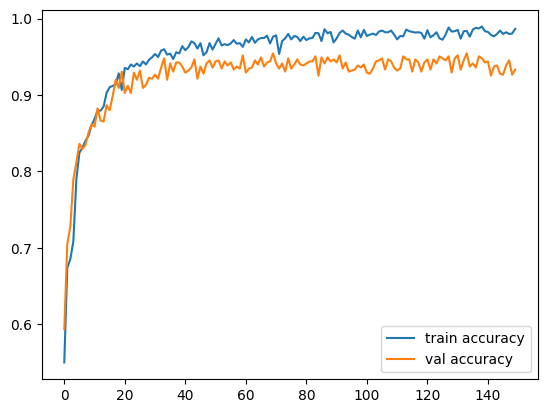

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()

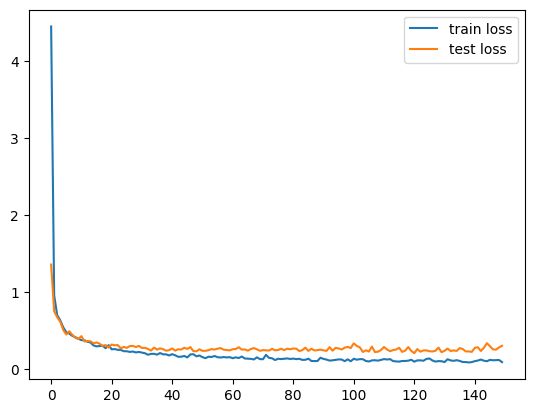

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test loss')
plt.legend()
plt.show()

## Final test

79/79 [==============================] - 0s 4ms/step


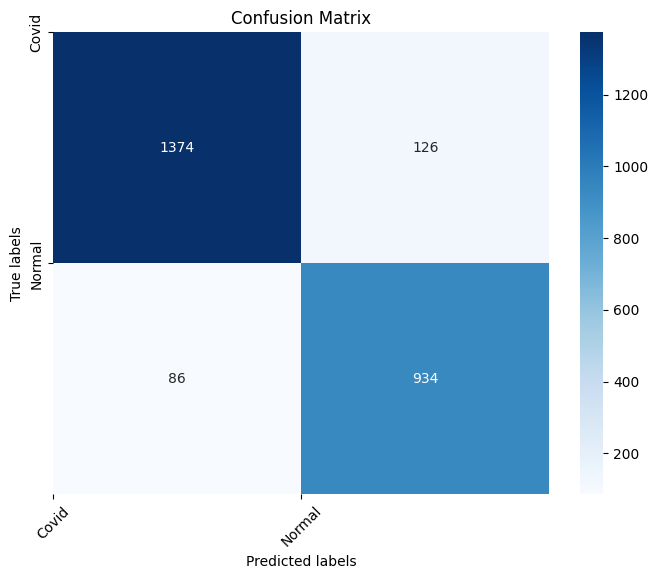

In [ ]:
Y_pred = model.predict(data_test)
def predict(y_hat):
    y_hat[y_hat >= 0.5] =1
    y_hat[y_hat<0.5] =0
    return y_hat
y_pred = predict(Y_pred)

class_labels = ['Covid', 'Normal']

cm = confusion_matrix(targets_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
labels = ['Covid', 'Normal']
report = classification_report(targets_test, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

       Covid       0.94      0.92      0.93      1500
      Normal       0.88      0.92      0.90      1020

    accuracy                           0.92      2520
   macro avg       0.91      0.92      0.91      2520
weighted avg       0.92      0.92      0.92      2520



1/1 [==============================] - 0s 32ms/step
Normal


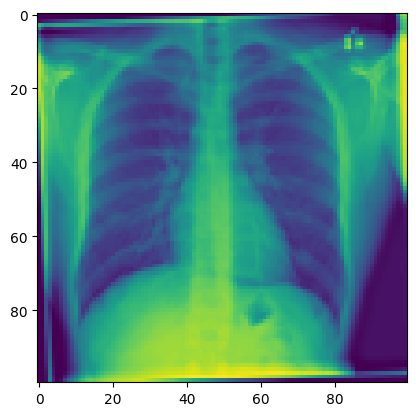

In [ ]:
from PIL import Image
import numpy as np

test_image = Image.open('/content/drive/MyDrive/Colab Notebooks/use/31.png')
test_image = test_image.resize((100, 100))
plt.imshow(test_image)
if test_image.mode != "RGB":
    test_image = test_image.convert("RGB")

test_image = np.array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'COVID'
    print(prediction)
else:
    prediction = 'Normal'
    print(prediction)



In [ ]:
model.save('models/covid_detection_model.h5')